# Part II - Loan Data From Prosper
## by Shamma'a Alsomaikhi

## Investigation Overview


> In this exploration, I aim to delve into various aspects of the dataset to understand the relationships and patterns associated with key features. The primary focus is on exploring how the borrower's income range correlates with the loan amount, investigating the interplay between Borrower Rate and Prosper Score, and analyzing the distribution of loan categories and the distribution of loan categories based on LoanOriginalAmount, Term , BorrowerRate.


## Dataset Overview

> The Loan Data from Prosper dataset comprises 113,937 loans, each with 81 variables. These variables include loan amount, borrower rate (interest rate), current loan status, borrower income, and various other attributes.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanDataClean.csv')
df.head(10)

,LoanKey,StatedMonthlyIncome,LoanOriginalAmount,EmploymentStatus,Occupation,LoanStatus,IncomeRange,Term,LoanOriginationDate,ClosedDate,BorrowerAPR,BorrowerRate,ProsperScore,ListingCategory
0,E33A3400205839220442E84,3083.333333,9425,Self-employed,Other,Completed,"$25,000-49,999",36,2007-09-12,2009-08-14 00:00:00.000,0.16516,0.1580,NaN,0
1,9E3B37071505919926B1D82,6125.000000,10000,Employed,Professional,Current,"$50,000-74,999",36,2014-03-03,NaN,0.12016,0.0920,7.0,2
2,6954337960046817851BCB2,2083.333333,3001,Not available,Other,Completed,Not displayed,36,2007-01-17,2009-12-17 00:00:00.000,0.28269,0.2750,NaN,0
3,A0393664465886295619C51,2875.000000,10000,Employed,Skilled Labor,Current,"$25,000-49,999",36,2012-11-01,NaN,0.12528,0.0974,9.0,16
4,A180369302188889200689E,9583.333333,15000,Employed,Executive,Current,"$100,000+",36,2013-09-20,NaN,0.24614,0.2085,4.0,2
5,C3D63702273952547E79520,8333.333333,15000,Employed,Professional,Current,"$100,000+",60,2013-12-24,NaN,0.15425,0.1314,10.0,1
6,CE963680102927767790520,2083.333333,3000,Employed,Sales - Retail,Current,"$25,000-49,999",36,2013-04-18,NaN,0.31032,0.2712,2.0,1
7,0C87368108902149313D53B,3355.750000,10000,Employed,Laborer,Current,"$25,000-49,999",36,2013-05-13,NaN,0.23939,0.2019,4.0,2
8,02163700809231365A56A1C,3333.333333,10000,Employed,Food Service,Current,"$25,000-49,999",36,2013-12-12,NaN,0.07620,0.0629,11.0,7
9,7C083651269973612460D6D,7500.000000,13500,Employed,Fireman,Current,"$75,000-99,999",60,2012-05-17,NaN,0.27462,0.2489,7.0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113066 entries, 0 to 113065
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   LoanKey              113066 non-null  object 
 1   StatedMonthlyIncome  113066 non-null  float64
 2   LoanOriginalAmount   113066 non-null  int64  
 3   EmploymentStatus     110811 non-null  object 
 4   Occupation           109537 non-null  object 
 5   LoanStatus           113066 non-null  object 
 6   IncomeRange          113066 non-null  object 
 7   Term                 113066 non-null  int64  
 8   LoanOriginationDate  113066 non-null  object 
 9   ClosedDate           55076 non-null   object 
 10  BorrowerAPR          113041 non-null  float64
 11  BorrowerRate         113066 non-null  float64
 12  ProsperScore         83982 non-null   float64
 13  ListingCategory      113066 non-null  int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 12.1+ MB


## How the borrower's income range correlates with the loan amount ?

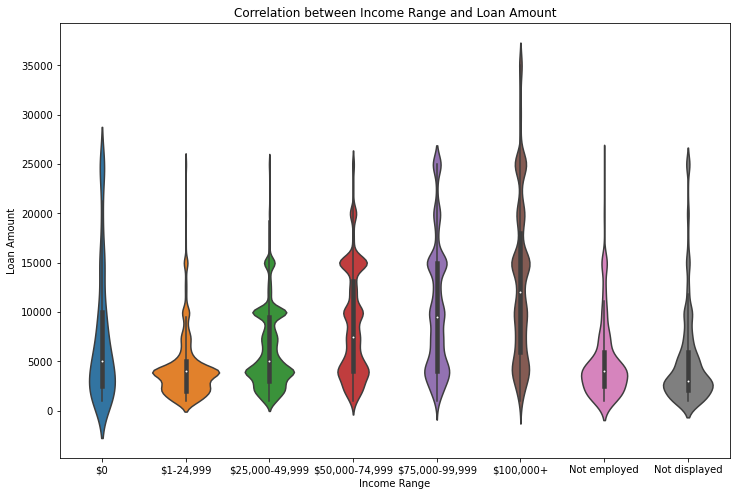

In [4]:
# Define the categories and their counts
categories = ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+', 'Not employed', 'Not displayed']
# Encode the categories with the correct order
df['IncomeRange'] = pd.Categorical(df['IncomeRange'], categories, ordered=True)

# Violin plot
plt.figure(figsize=(12, 8))
sb.violinplot(x='IncomeRange', y='LoanOriginalAmount', data=df)
plt.title('Correlation between Income Range and Loan Amount')
plt.xlabel('Income Range')
plt.ylabel('Loan Amount')
plt.show()

Individuals with an income range of 100,000 or more were the only ones obtaining loan amounts exceeding 30,000. In most income ranges, individuals typically secure loan amounts of 5,000 or less. Moreover, there is a noticeable decrease in the number of loans taken as the amount exceeds 5,000.

##  How Does Prosper Score Impact Borrower Rates?

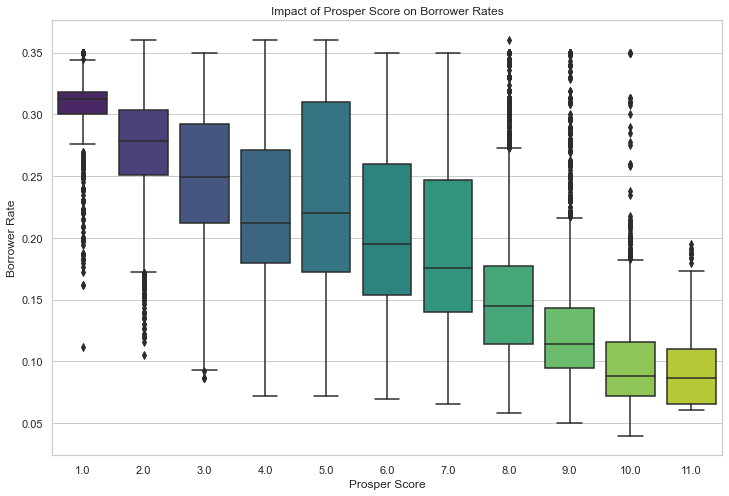

In [5]:
# Drop rows with missing ProsperScore and BorrowerRate values
subset_df = df[['ProsperScore', 'BorrowerRate']].dropna()

# Set style
sb.set(style="whitegrid")

# Create a box plot or violin plot
plt.figure(figsize=(12, 8))
sb.boxplot(x='ProsperScore', y='BorrowerRate', data=subset_df, palette='viridis')
plt.title('Impact of Prosper Score on Borrower Rates')
plt.xlabel('Prosper Score')
plt.ylabel('Borrower Rate')
plt.show()

As the Borrower Rate increases, there is a negative correlation with Prosper Score.

## The distribution of loan categories

#### The distribution of loans:
 
 	
> The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

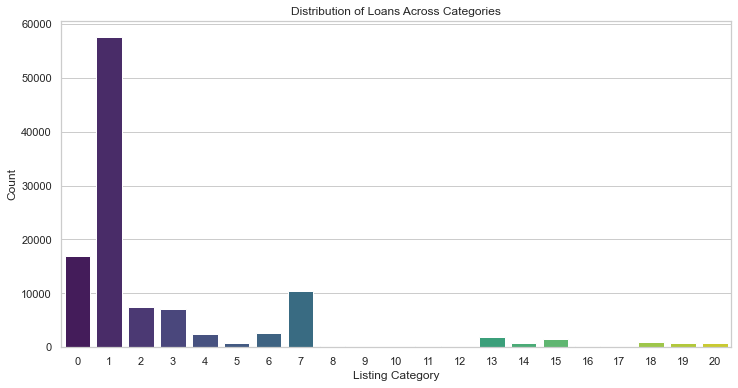

In [6]:
# Count plot for analyzing the distribution of loans
plt.figure(figsize=(12, 6))
sb.countplot(x='ListingCategory', data=df, palette='viridis')
plt.title('Distribution of Loans Across Categories')
plt.xlabel('Listing Category')
plt.ylabel('Count')
plt.show()

Most people generally opt for Debt Consolidation loans.

#### The distribution of loan categories based on LoanOriginalAmount, Term , BorrowerRate:

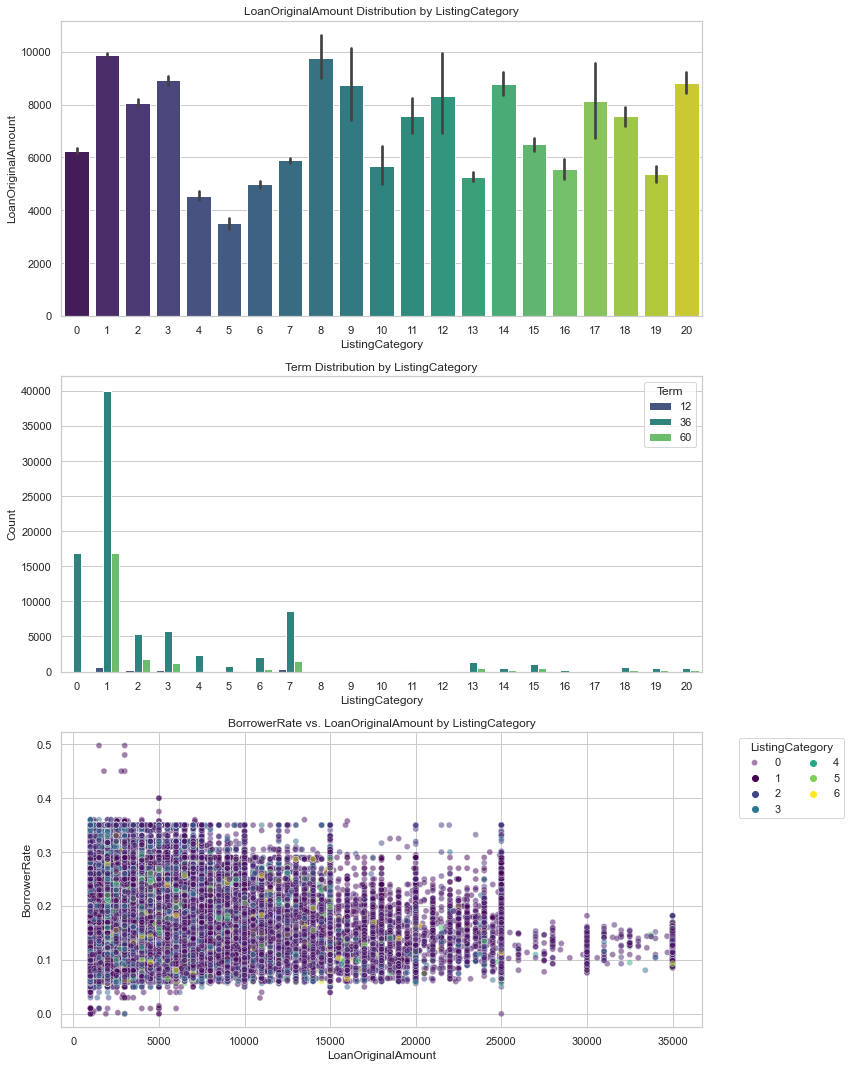

In [7]:
# Set style
sb.set(style="whitegrid")

# Create a subplot with three axes
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

# Plot for LoanOriginalAmount vs. ListingCategory
sb.barplot(x='ListingCategory', y='LoanOriginalAmount', data=df, ax=axes[0], palette='viridis')
axes[0].set_title('LoanOriginalAmount Distribution by ListingCategory')
axes[0].set_xlabel('ListingCategory')
axes[0].set_ylabel('LoanOriginalAmount')

# Plot for Term vs. ListingCategory
sb.countplot(x='ListingCategory', hue='Term', data=df, ax=axes[1], palette='viridis')
axes[1].set_title('Term Distribution by ListingCategory')
axes[1].set_xlabel('ListingCategory')
axes[1].set_ylabel('Count')
axes[1].legend(title='Term', loc='upper right')

# BorrowerRate vs. LoanOriginalAmount by ListingCategory
scatter = sb.scatterplot(x='LoanOriginalAmount', y='BorrowerRate', hue='ListingCategory', data=df, ax=axes[2], palette='viridis', alpha=0.5)
axes[2].set_title('BorrowerRate vs. LoanOriginalAmount by ListingCategory')
axes[2].set_xlabel('LoanOriginalAmount')
axes[2].set_ylabel('BorrowerRate')
# Manually set legend labels for all categories
all_categories = range(0, 21)
legend_labels = [str(category) for category in all_categories]
scatter.legend(title='ListingCategory', labels=legend_labels, bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)

plt.tight_layout()
plt.show()

#### Loan Original Amount Distribution by ListingCategory
The two Listing Categories where people tend to have higher Loan Original Amounts are:
1. Debt Consolidation
2. Baby & Adoption

Additionally, Wedding Loans, Boat, Large Purchases, Business, and Green Loans are categories where people tend to have loan amounts exceeding 8000.

#### Term Distribution by ListingCategory
In each Listing Category, the 36-month term is the most commonly chosen option.

#### BorrowerRate vs. LoanOriginalAmount by ListingCategory
The graph provides a comprehensive overview of the distribution of Loan Original Amount, Borrower Rate, and Listing Category. It aligns with our earlier observations, highlighting that Debt Consolidation is the most common loan purpose. The majority of loans fall within the 1000 and lower range, and as we move to higher loan original amounts, the data points become less densely clustered. Additionally, it's noticeable that a significant proportion of loans have Borrower Rates below 0.4.

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 1026556 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
